In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
from sylvestorch.models import SylvesterNet

In [3]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

In [4]:
sylvester = SylvesterNet(10, 3, 3).to(device)

In [5]:
x = torch.randn((4, 3), device=device)

100%|██████████| 100/100 [00:02<00:00, 35.24it/s]


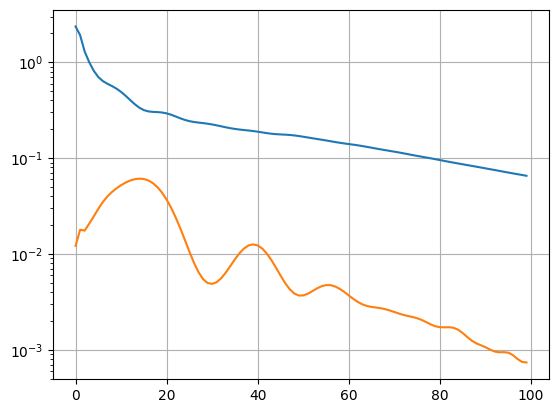

In [6]:
logs = sylvester.fit(x, epochs=100, lr=0.01)
plt.plot(logs['meansquare'])
plt.plot(logs['logdet'])
plt.yscale('log')
plt.grid()
plt.show()

In [7]:
with torch.no_grad():
    y, l = sylvester(x)
print(x.square().mean().item())
print(y.square().mean().item())

1.3749092817306519
0.06427211314439774
